## Sprint 3 Trees
### Extracting rodas from VHR images using trees and pattern spectra
### By Sahar Mohamed

#### Instructions
Sprint on Trees - Activity 3: Build your own Pattern Spectrum!

    Select some EO data that contain objects/structures of interest
    Design specific attribute(s) that would be useful to identify the elements of interest
    Write a Jupyter Notebook that extract automatically the elements of interest from the data
    Assess your solution on several images, and discuss its relevance
    Complete the notebook with description and justification of the attributes used, and clear explanations of the different steps in the process

Remark: the features you will use/suggest could be added to the core SAP library!

In [1]:
from pathlib import Path # Manage folders and files
import rasterio as rio # Reads and writes geospatial raster data
from matplotlib import pyplot as plt # Display plots and images
import numpy as np # Multi-dimensional arrays
import sap # To create morphological trees
import higra as hg # High-performance image processing

In [2]:
## Download sample data from open aerial map website
#!wget https://oin-hotosm-temp.s3.amazonaws.com/5bc82ffd9ca0a4000742a12b/0/5bc82ffd9ca0a4000742a12c.tif

In [3]:
# Load Drone image for saudi arabia site
image = Path('5bc82ffd9ca0a4000742a12c.tif')
with rio.open(image) as src:
    img = src.read(1)  # Read the first band (grayscale)
    profile = src.profile  # Get metadata
print(profile)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 7410, 'height': 8119, 'count': 3, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 39N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",51],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32639"]]'), 'transform': Affine(0.04999470842140711, 0.0, 211440.99395795987,
       0.0, -0.049998891233369175, 3251103.426790202), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'jpeg', 'interleave': 'pixel', 'photometric': 'ycbcr'}


In [4]:
print(img.dtype)

print (img.shape)

uint8
(8119, 7410)


## this is my first image , i want to extract the roads and the connected parts to it , exclusing the water homogenous area.

(8119, 7410)


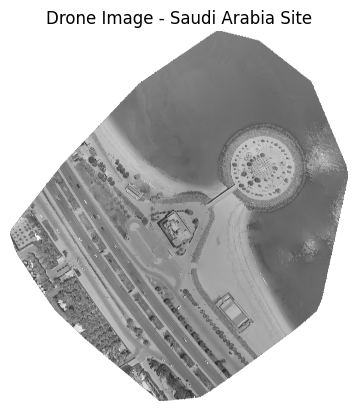

In [6]:
## shap of the image
print(img.shape)  # (bands, height, width)

# normalize to [0, 255]
img = (img - img.min()) / (img.max() - img.min())
img = (img * 255)
img = img.astype(np.uint8)

## delete background objects
img[img == 0] = 255


# Display the image
plt.imshow(img, cmap='gray')
plt.title('Drone Image - Saudi Arabia Site')
plt.axis('off')
plt.show()


In [ ]:
image = img /255.0. # normalize to [0, 1]
print (image.min(), image.max())

0.00392156862745098 1.0


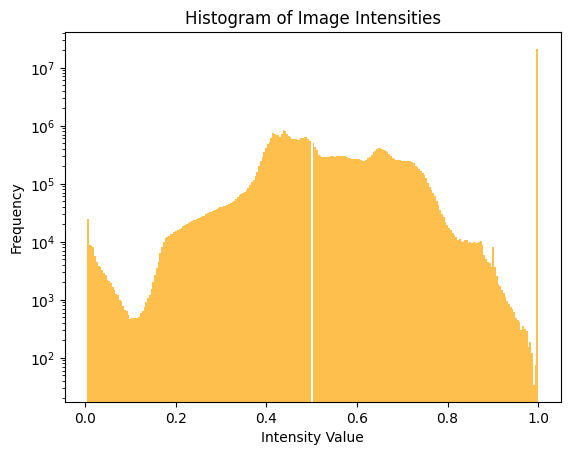

In [16]:
## display histogram
plt.hist(image.ravel(), bins=256, color='orange', alpha=0.7)
plt.title('Histogram of Image Intensities')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.yscale('log')  
plt.show()


In [ ]:
## build max-tree for the image reconstruction

max_tree = sap.MaxTree(image)
print(f'Max-Tree has {max_tree.num_nodes} nodes.')

Max-Tree has <bound method Tree.num_nodes of MaxTree{'adjacency': 4,
 'image.dtype': dtype('float64'),
 'image.shape': (8119, 7410),
 'image_hash': 'd1743227',
 'image_name': None,
 'num_nodes': 62917546}> nodes.


In [ ]:
## attributes 

area = max_tree.get_attribute("area")  # Compute area which related the size of the regions)
compact = max_tree.get_attribute("compactness")  # Compute compactness attribute for shape analysis
mi = max_tree.get_attribute("moment_of_inertia")  # Compute moment invariant which models the elongationof the regions based on the paper by Mauro Dalla et al.2010
print('area', area[:50])
print("---------------------------------")
print('compactness', compact[:50])
print("---------------------------------")
print('moment of inertia', mi[:50])

area [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
---------------------------------
compactness [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
---------------------------------
moment of inertia [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [19]:
## ranges of attributes
print('Area: ', area.min(), area.max())
print('Compactness: ', compact.min(), compact.max())
print('Moment of Inertia: ', mi.min(), mi.max())


Area:  1.0 60161790.0
Compactness:  0.0002657945463906186 1.0
Moment of Inertia:  0.0 26.614127951180876


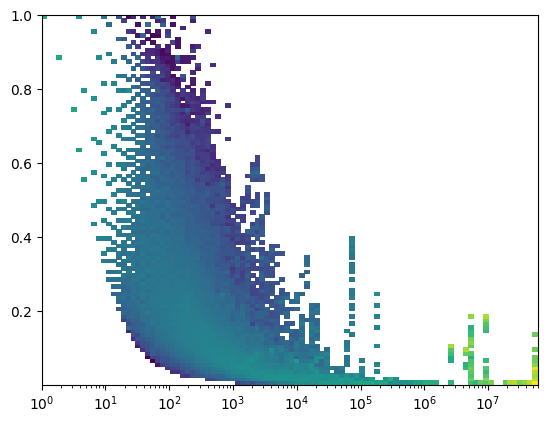

In [20]:
## visulaize pattern spectra
ps = sap.spectrum2d(max_tree, 'area', 'compactness', x_log=True)
sap.show_spectrum(*ps)


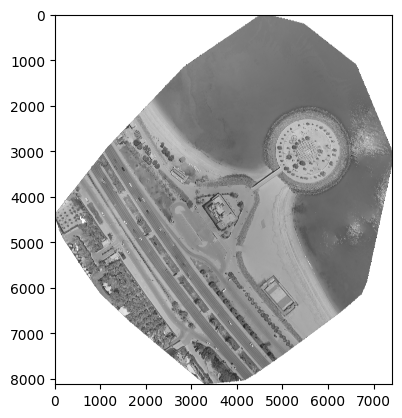

In [22]:
# plot image 
plt.imshow(image, cmap='gray')

In [99]:
## thresholds to extract objects
area_min , area_max = 100, 2000000   # good 1000, 1000000
#compact_min , compact_max = 0.01, 1    # good 0.01, 1
mi_min , mi_max = 1, 20     # good 1, 15 or 1 ,17

## filter max-tree based on thresholds
mask = (area >= area_min) & (area <= area_max) & \
       (mi >= mi_min) & (mi <= mi_max)


# mask = (area >= area_min) & (area <= area_max) & \
#        (compact >= compact_min) & (compact <= compact_max) & \
#        (mi >= mi_min) & (mi <= mi_max)

print(f'Number of nodes after filtering: {np.sum(mask)}')

Number of nodes after filtering: 6654


### NOTE: I removed compactness here as it didn't give me good result 

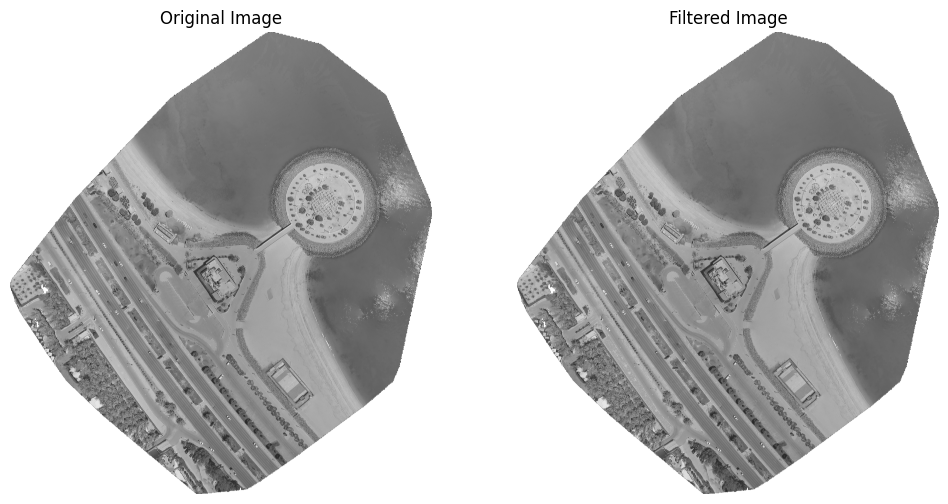

In [ ]:
filtered_tree = max_tree.reconstruct(mask) # reconstruct filtered image

## display
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Filtered Image')
plt.imshow(filtered_tree, cmap='gray')
plt.axis('off')
plt.show()

In [101]:
# mask image for the selected nodes
node_mask = np.zeros(image.size, dtype=bool)

all_vertices = hg.attribute_vertex_list(max_tree._tree) # get list of pixels for each node

for node_id, selected in enumerate(mask): # iterate over nodes
    if selected:
        pixels = all_vertices[node_id]  # list of leaf pixels in the node
        node_mask[pixels] = True

print("Number of pixels selected:", np.sum(node_mask))

Number of pixels selected: 3610135


In [102]:
node_mask_2d = node_mask.reshape(image.shape) # reshape to 2D
print(node_mask_2d.shape)

(8119, 7410)


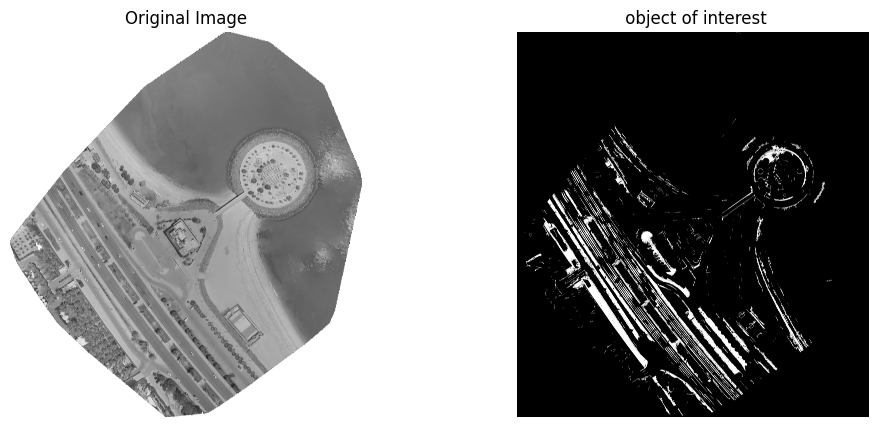

In [103]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(node_mask_2d, cmap='gray')
plt.title(" object of interest")
plt.axis("off")

plt.show()

## I tried multiple hits and trial and this is so far the good thresholds 

### I will verify on another images

In [ ]:
#! wget https://oin-hotosm-temp.s3.us-east-1.amazonaws.com/693d70e185300c176da56409/0/693d70e185300c176da5640a.tif

--2025-12-17 15:07:48--  https://oin-hotosm-temp.s3.us-east-1.amazonaws.com/693d70e185300c176da56409/0/693d70e185300c176da5640a.tif
Resolving oin-hotosm-temp.s3.us-east-1.amazonaws.com (oin-hotosm-temp.s3.us-east-1.amazonaws.com)... 52.216.211.42, 16.182.64.10, 54.231.225.178, ...
Connecting to oin-hotosm-temp.s3.us-east-1.amazonaws.com (oin-hotosm-temp.s3.us-east-1.amazonaws.com)|52.216.211.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63264161 (60M) [image/tiff]
Saving to: ‘693d70e185300c176da5640a.tif’

693d70e185300c176da 100%[===================>]  60.33M  10.2MB/s    in 6.5s    

2025-12-17 15:07:55 (9.33 MB/s) - ‘693d70e185300c176da5640a.tif’ saved [63264161/63264161]



In [ ]:
# download another image
!wget https://oin-hotosm-temp.s3.us-east-1.amazonaws.com/65f30a7ddf9d1600016b7a5a/0/65f30a7ddf9d1600016b7a5b.tif

--2025-12-17 15:59:10--  https://oin-hotosm-temp.s3.us-east-1.amazonaws.com/65f30a7ddf9d1600016b7a5a/0/65f30a7ddf9d1600016b7a5b.tif
Resolving oin-hotosm-temp.s3.us-east-1.amazonaws.com (oin-hotosm-temp.s3.us-east-1.amazonaws.com)... 54.231.166.194, 52.216.212.26, 54.231.196.50, ...
Connecting to oin-hotosm-temp.s3.us-east-1.amazonaws.com (oin-hotosm-temp.s3.us-east-1.amazonaws.com)|54.231.166.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12512917 (12M) [binary/octet-stream]
Saving to: ‘65f30a7ddf9d1600016b7a5b.tif’

65f30a7ddf9d1600016 100%[===================>]  11.93M  4.91MB/s    in 2.4s    

2025-12-17 15:59:13 (4.91 MB/s) - ‘65f30a7ddf9d1600016b7a5b.tif’ saved [12512917/12512917]



In [2]:
image_2 = Path('65f30a7ddf9d1600016b7a5b.tif')
with rio.open(image_2) as src:
    img_2 = src.read(1)  # Read the first band (grayscale)
    profile_2 = src.profile  # Get metadata
print(profile_2)


{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 6979, 'height': 8311, 'count': 3, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 49S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",111],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32749"]]'), 'transform': Affine(0.031790000000000006, 0.0, 520167.26171000005,
       0.0, -0.031790000000000006, 9695079.662050001), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'jpeg', 'interleave': 'pixel', 'photometric': 'ycbcr'}


In [3]:
img_2.shape

(8311, 6979)

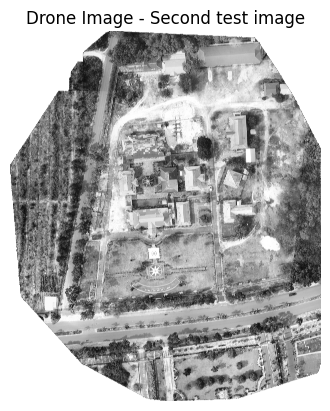

In [4]:

# normalize to [0, 255]
# normalize to 0 and 1 
img_2 = (img_2 - img_2.min()) / (img_2.max() - img_2.min())
img_2 = (img_2 * 255)
img_2 = img_2.astype(np.uint8)

## delete background objects
img_2[img_2 == 0] = 255


# Display the image
plt.imshow(img_2, cmap='gray')
plt.title('Drone Image - Second test image')
plt.axis('off')
plt.show()

0.00392156862745098 1.0


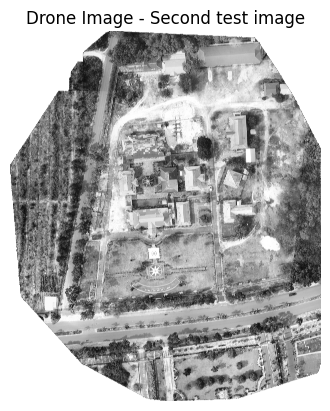

In [5]:
image_2 = img_2 / 255.0
print (image_2.min(), image_2.max())


##plot
plt.imshow(image_2, cmap='gray')
plt.title('Drone Image - Second test image')
plt.axis('off')
plt.show()

In [6]:
image_2.dtype

dtype('float64')

In [7]:
## bukding tree for img2
max_tree_2 = sap.MaxTree(image_2)
print(f'Max-Tree has {max_tree_2.num_nodes} nodes.')

## img2  attributes
area_2 = max_tree_2.get_attribute("area")  # Compute area attribute
compact_2 = max_tree_2.get_attribute("compactness")  # Compute compactness attribute
mi_2 = max_tree_2.get_attribute("moment_of_inertia")  # Compute moment invariant attribute
print('area', area_2[:50])
print("---------------------------------")
print('compactness', compact_2[:50])
print("---------------------------------") 
print('moment of inertia', mi_2[:50])


## ranges of attributes for img2
print('Area: ', area_2.min(), area_2.max())
print('Compactness: ', compact_2.min(), compact_2.max())
print('Moment of Inertia: ', mi_2.min(), mi_2.max())

Max-Tree has <bound method Tree.num_nodes of MaxTree{'adjacency': 4,
 'image.dtype': dtype('float64'),
 'image.shape': (8311, 6979),
 'image_hash': '30dc1978',
 'image_name': None,
 'num_nodes': 66293710}> nodes.
area [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
---------------------------------
compactness [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
---------------------------------
moment of inertia [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Area:  1.0 58002469.0
Compactness:  0.00010860627888921514 1.0
Moment of Inertia:  0.0 15.136463475004414


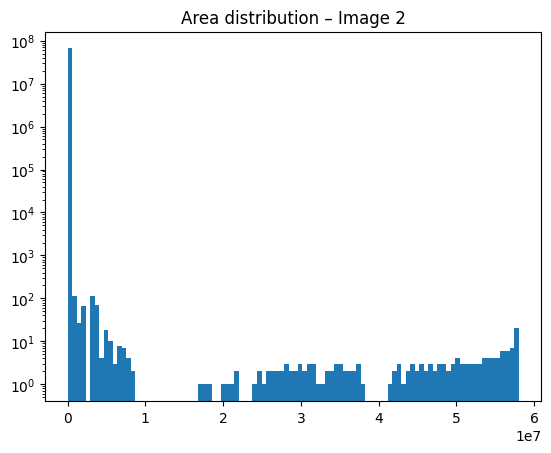

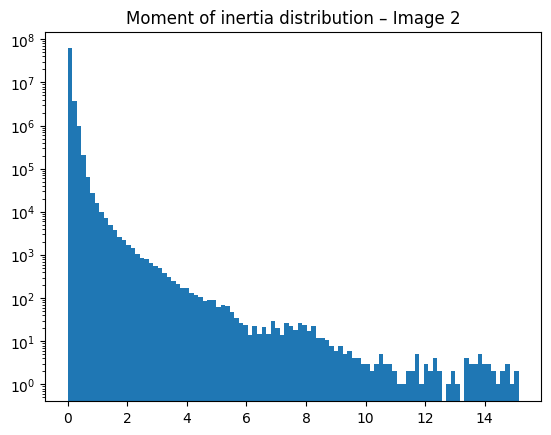

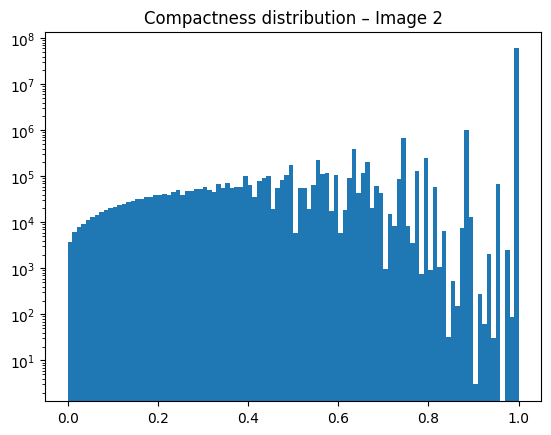

In [8]:
plt.hist(area_2, bins=100)
plt.title("Area distribution – Image 2")
plt.yscale('log')
plt.show()

plt.hist(mi_2, bins=100)
plt.title("Moment of inertia distribution – Image 2")
plt.yscale('log')
plt.show()

plt.hist(compact_2, bins=100)
plt.title("Compactness distribution – Image 2")
plt.yscale('log')
plt.show()


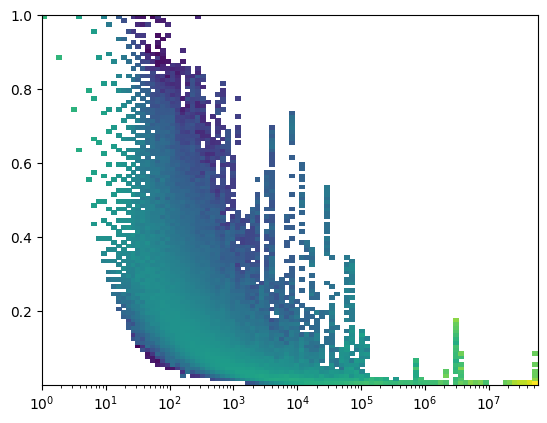

In [9]:
## pattern spectra for img2
ps_2 = sap.spectrum2d(max_tree_2, 'area', 'compactness', x_log=True)
sap.show_spectrum(*ps_2)

Number of nodes after filtering: 28767
Number of pixels selected: 4832702
(8311, 6979)


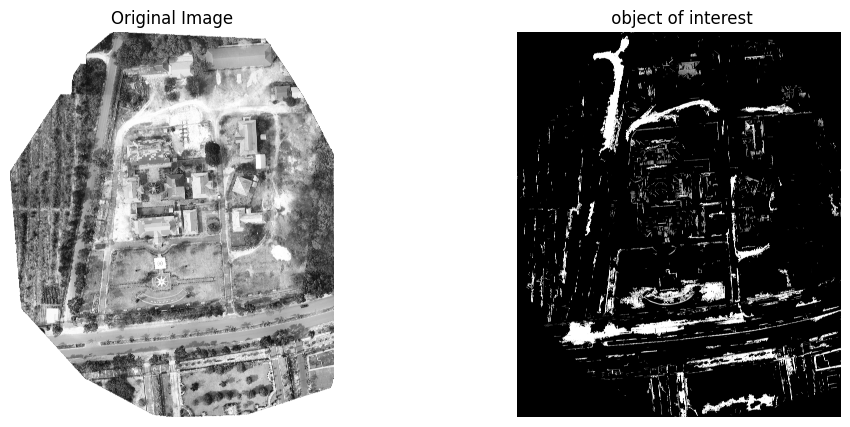

In [10]:
## thresholds to extract objects
area_min , area_max = 100, 2000000   # good 1000, 1000000
#compact_min , compact_max = 0.01, 1    # good 0.01, 1
mi_min , mi_max = 1, 20     # good 1, 15 or 1 ,17

## filter max-tree based on thresholds
mask2 = (area_2 >= area_min) & (area_2 <= area_max) & \
       (mi_2 >= mi_min) & (mi_2 <= mi_max)


# mask = (area >= area_min) & (area <= area_max) & \
#        (compact >= compact_min) & (compact <= compact_max) & \
#        (mi >= mi_min) & (mi <= mi_max)

print(f'Number of nodes after filtering: {np.sum(mask2)}')

# reconstruct filtered tree
filtered_tree_2 = max_tree_2.reconstruct(mask2)

# mask image for the selected nodes
node_mask2 = np.zeros(image_2.size, dtype=bool)

all_vertices_2 = hg.attribute_vertex_list(max_tree_2._tree) # get list of pixels for each node

for node_id, selected in enumerate(mask2): # iterate over nodes
    if selected:
        pixels = all_vertices_2[node_id]  # list of leaf pixels in the node
        node_mask2[pixels] = True

print("Number of pixels selected:", np.sum(node_mask2))



## reshape the mask
mask_2d = node_mask2.reshape(image_2.shape) # reshape to 2D
print(mask_2d.shape)


## visulaize results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_2, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(mask_2d, cmap='gray')
plt.title(" object of interest")
plt.axis("off")
plt.show()





## Marks:
### the roads that has no tree and appear clearay can be extracted here , otherwise it mismatched with trees 

### I will try to use customised threholds 

Number of nodes after filtering: 4760
Number of pixels selected: 3986131
(8311, 6979)


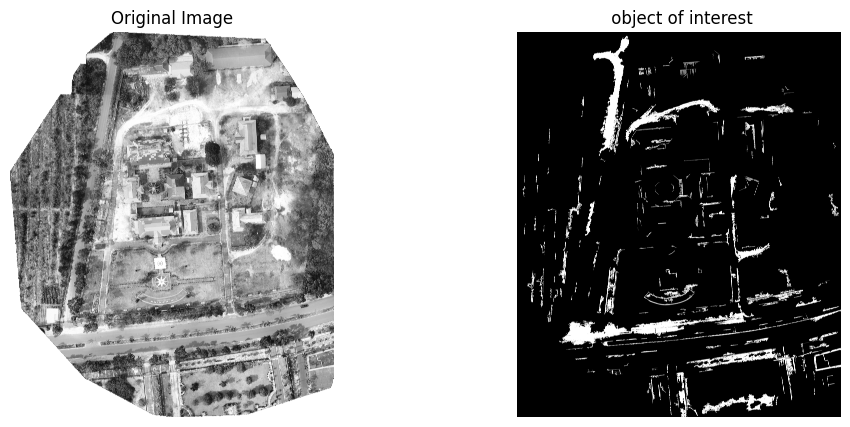

In [ ]:
## thresholds to extract objects
area_min , area_max = 1000, 4000000   
compact_min , compact_max = 0.001, 1   
mi_min , mi_max = 1, 14    

## filter max-tree based on thresholds
mask2 = (area_2 >= area_min) & (area_2 <= area_max) & \
       (compact_2 >= compact_min) & (compact_2 <= compact_max) & \
       (mi_2 >= mi_min) & (mi_2 <= mi_max)


# mask = (area >= area_min) & (area <= area_max) & \
#        (compact >= compact_min) & (compact <= compact_max) & \
#        (mi >= mi_min) & (mi <= mi_max)

print(f'Number of nodes after filtering: {np.sum(mask2)}')

# reconstruct filtered tree
filtered_tree_2 = max_tree_2.reconstruct(mask2)

# mask image for the selected nodes
node_mask2 = np.zeros(image_2.size, dtype=bool)

all_vertices_2 = hg.attribute_vertex_list(max_tree_2._tree) # get list of pixels for each node

for node_id, selected in enumerate(mask2): # iterate over nodes
    if selected:
        pixels = all_vertices_2[node_id]  # list of leaf pixels in the node
        node_mask2[pixels] = True

print("Number of pixels selected:", np.sum(node_mask2))



## reshape the mask
mask_2d = node_mask2.reshape(image_2.shape) # reshape to 2D
print(mask_2d.shape)


## visulaize results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_2, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(mask_2d, cmap='gray')
plt.title(" object of interest")
plt.axis("off")
plt.show()





## I will try another way

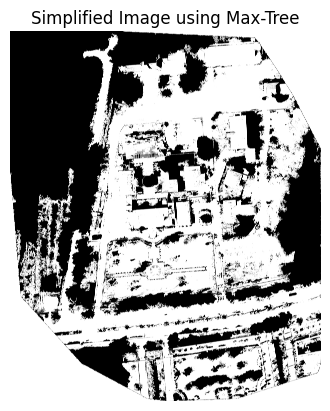

In [ ]:
# build max-tree and simplify using higra

graph = hg.get_4_adjacency_implicit_graph(image_2.shape) # get 4-adjacency graph 
tree, altitudes = hg.component_tree_max_tree(graph, image_2) # build max-tree
volume = hg.attribute_volume(tree, altitudes) # compute volume attribute for simplification

tree, node_map = hg.simplify_tree(tree, volume < 10000000) # simplify tree based on volume attribute
altitudes = altitudes[node_map] # update altitudes after simplification
extr = hg.attribute_extrema(tree, altitudes) # get extrema attribute for reconstruction

res = hg.reconstruct_leaf_data(tree, extr) # reconstruct simplified image

# plottig
plt.imshow(res, cmap='gray')
plt.title('Simplified Image using Max-Tree')
plt.axis('off')
plt.show()

#### some shadow effects, I think (if the deadline is not too soon for me now :( ) it's better to calssify the image first with RF or SVM then buikding tress and thresholding them

# DRAFT: Some of the future Work

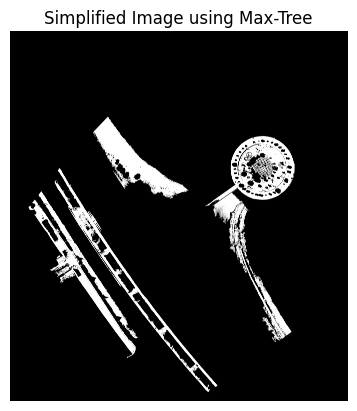

In [ ]:
## max tree for extract other objects rather than water FOR IMG1

image = img / 255 # normalize image to [0, 1]

graph = hg.get_4_adjacency_implicit_graph(image.shape) # get 4-adjacency graph 
tree, altitudes = hg.component_tree_max_tree(graph, image) # build max-tree
volume = hg.attribute_volume(tree, altitudes) # compute volume attribute for simplification

tree, node_map = hg.simplify_tree(tree, volume < 100000) # simplify tree based on volume attribute
altitudes = altitudes[node_map] # update altitudes after simplification
extr = hg.attribute_extrema(tree, altitudes) # get extrema attribute for reconstruction

res = hg.reconstruct_leaf_data(tree, extr) # reconstruct simplified image

# plottig
plt.imshow(res, cmap='gray')
plt.title('Simplified Image using Max-Tree')
plt.axis('off')
plt.show()

In [39]:
volume.min(), volume.max()

(np.float64(0.0), np.float64(20652949.717651516))

#### ALL the built-in areas excluding the water

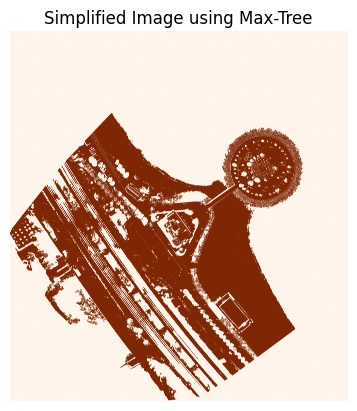

In [51]:
## max tree for extract other objects rather than water

image = img / 255 # normalize image to [0, 1]

graph = hg.get_4_adjacency_implicit_graph(image.shape) # get 4-adjacency graph 
tree, altitudes = hg.component_tree_max_tree(graph, image) # build max-tree
volume = hg.attribute_volume(tree, altitudes) # compute volume attribute for simplification

tree, node_map = hg.simplify_tree(tree, volume < 2000000) # simplify tree based on volume attribute
altitudes = altitudes[node_map] # update altitudes after simplification
extr = hg.attribute_extrema(tree, altitudes) # get extrema attribute for reconstruction

res = hg.reconstruct_leaf_data(tree, extr) # reconstruct simplified image

# plottig
plt.imshow(res, cmap='Oranges')
plt.title('Simplified Image using Max-Tree')
plt.axis('off')
plt.show()

In [23]:
image = img / 255.0
imge_inv = 1.0 - image  # Invert image for water extraction
imge_inv.dtype

image.dtype

dtype('float64')

# ANEXX

### min tree pattern spectra 

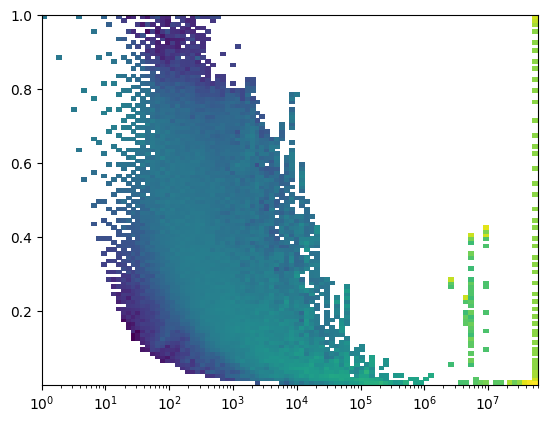

Number of nodes after filtering: 28273
Number of pixels selected: 1850312
(8311, 6979)


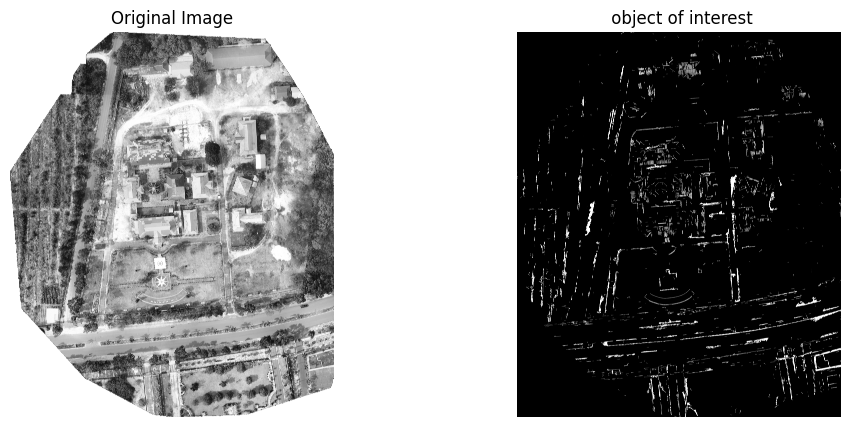

In [ ]:
## thresholds to extract objects
area_min , area_max = 100, 2000000   
compact_min , compact_max = 0.01, 0.8    
mi_min , mi_max = 1, 10    

## filter max-tree based on thresholds
mask2 = (area_2 >= area_min) & (area_2 <= area_max) & \
       (compact_2 >= compact_min) & (compact_2 <= compact_max) & \
       (mi_2 >= mi_min) & (mi_2 <= mi_max)


# mask = (area >= area_min) & (area <= area_max) & \
#        (compact >= compact_min) & (compact <= compact_max) & \
#        (mi >= mi_min) & (mi <= mi_max)

print(f'Number of nodes after filtering: {np.sum(mask2)}')

# reconstruct filtered tree
filtered_tree_2 = max_tree_2.reconstruct(mask2)

# mask image for the selected nodes
node_mask2 = np.zeros(image_2.size, dtype=bool)

all_vertices_2 = hg.attribute_vertex_list(max_tree_2._tree) # get list of pixels for each node

for node_id, selected in enumerate(mask2): # iterate over nodes
    if selected:
        pixels = all_vertices_2[node_id]  # list of leaf pixels in the node
        node_mask2[pixels] = True

print("Number of pixels selected:", np.sum(node_mask2))



## reshape the mask
mask_2d = node_mask2.reshape(image_2.shape) # reshape to 2D
print(mask_2d.shape)


## visulaize results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_2, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(mask_2d, cmap='gray')
plt.title(" object of interest")
plt.axis("off")
plt.show()



